# Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Dataset for Problem 1: cubic_zirconia.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [2]:
df = pd.read_csv("cubic_zirconia.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
df.shape

(26967, 11)

In [8]:
df.iloc[:,1:].describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [10]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [12]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


-The first column is an index ("Unnamed: 0")as this only serial no, so we can remove it.

-The data set contains 26967 rows, 11 columns.

-In the given data set there are 2 Integer type features,6 Float type features, 3 Object type features

-'price' is the target variable and all other are independent variables.

-only 'depth' column has NULL values.

-There are 34 duplicate rows

### Univariate analysis

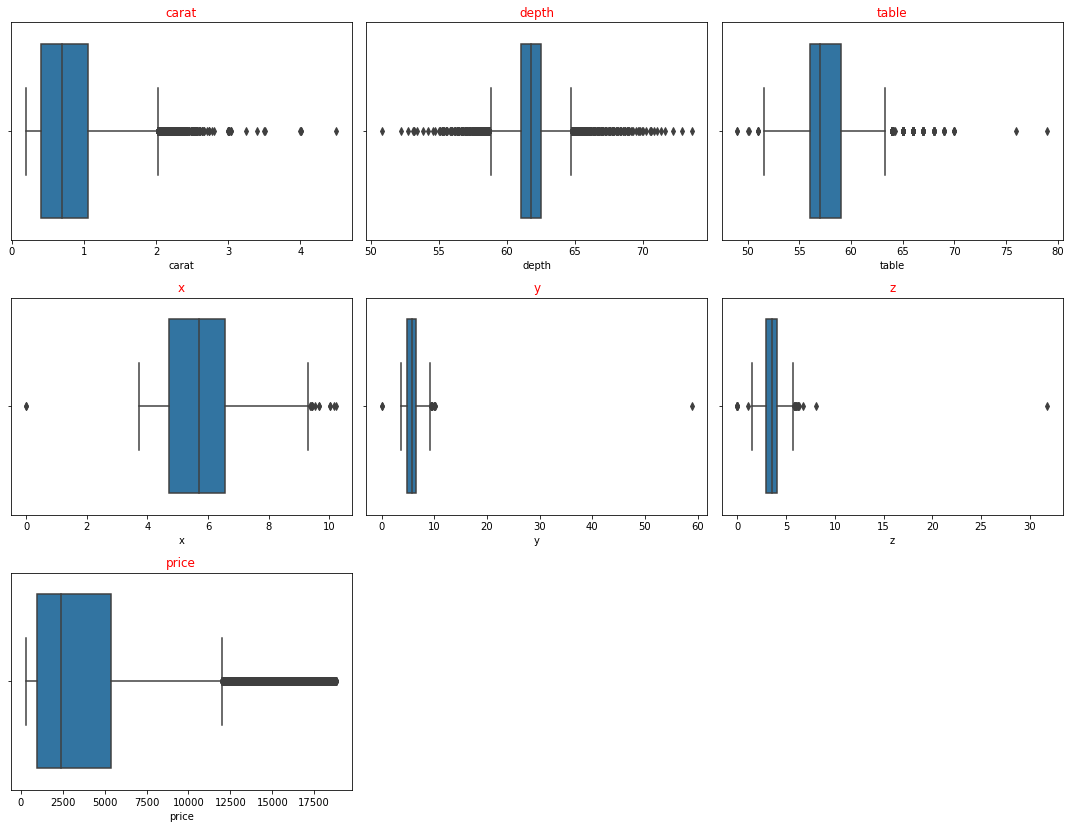

In [13]:
data_plot=df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

fig=plt.figure(figsize=(15,15))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')

plt.tight_layout()

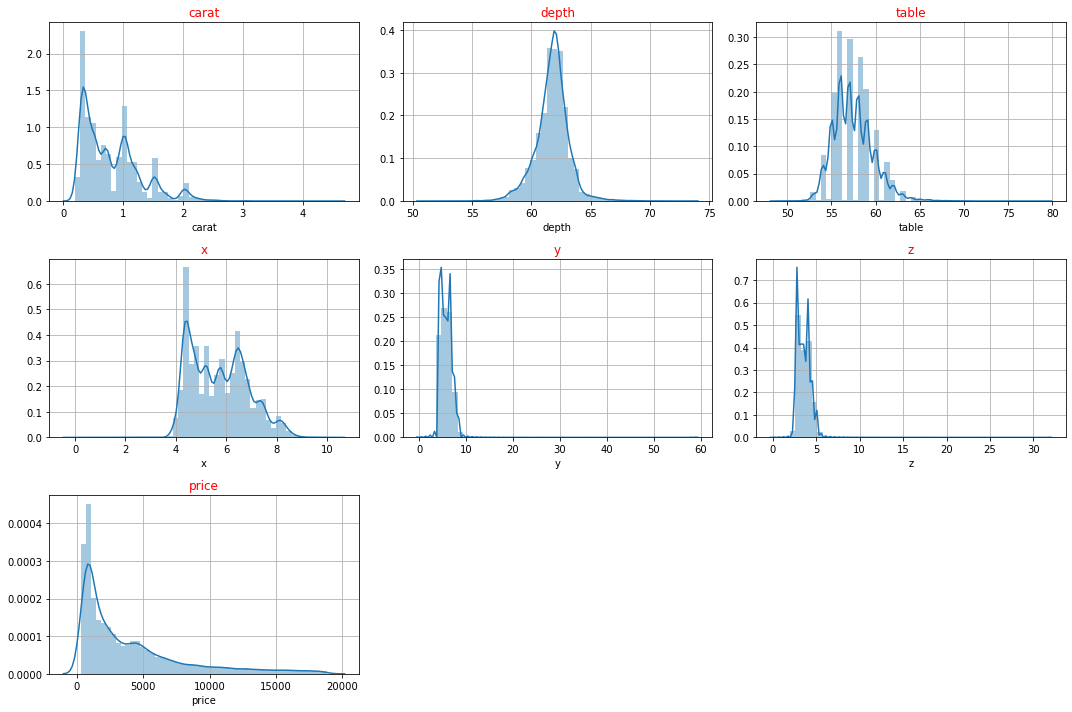

In [14]:
data_plot=df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

fig=plt.figure(figsize=(15,10))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=True)
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()

plt.tight_layout()

-There is significant amount of outlier present in some variable. 

-We can see that the distribution of some quantitative features like "carat" and the target feature "price" are moreof "right-skewed".

### Bivariate analysis

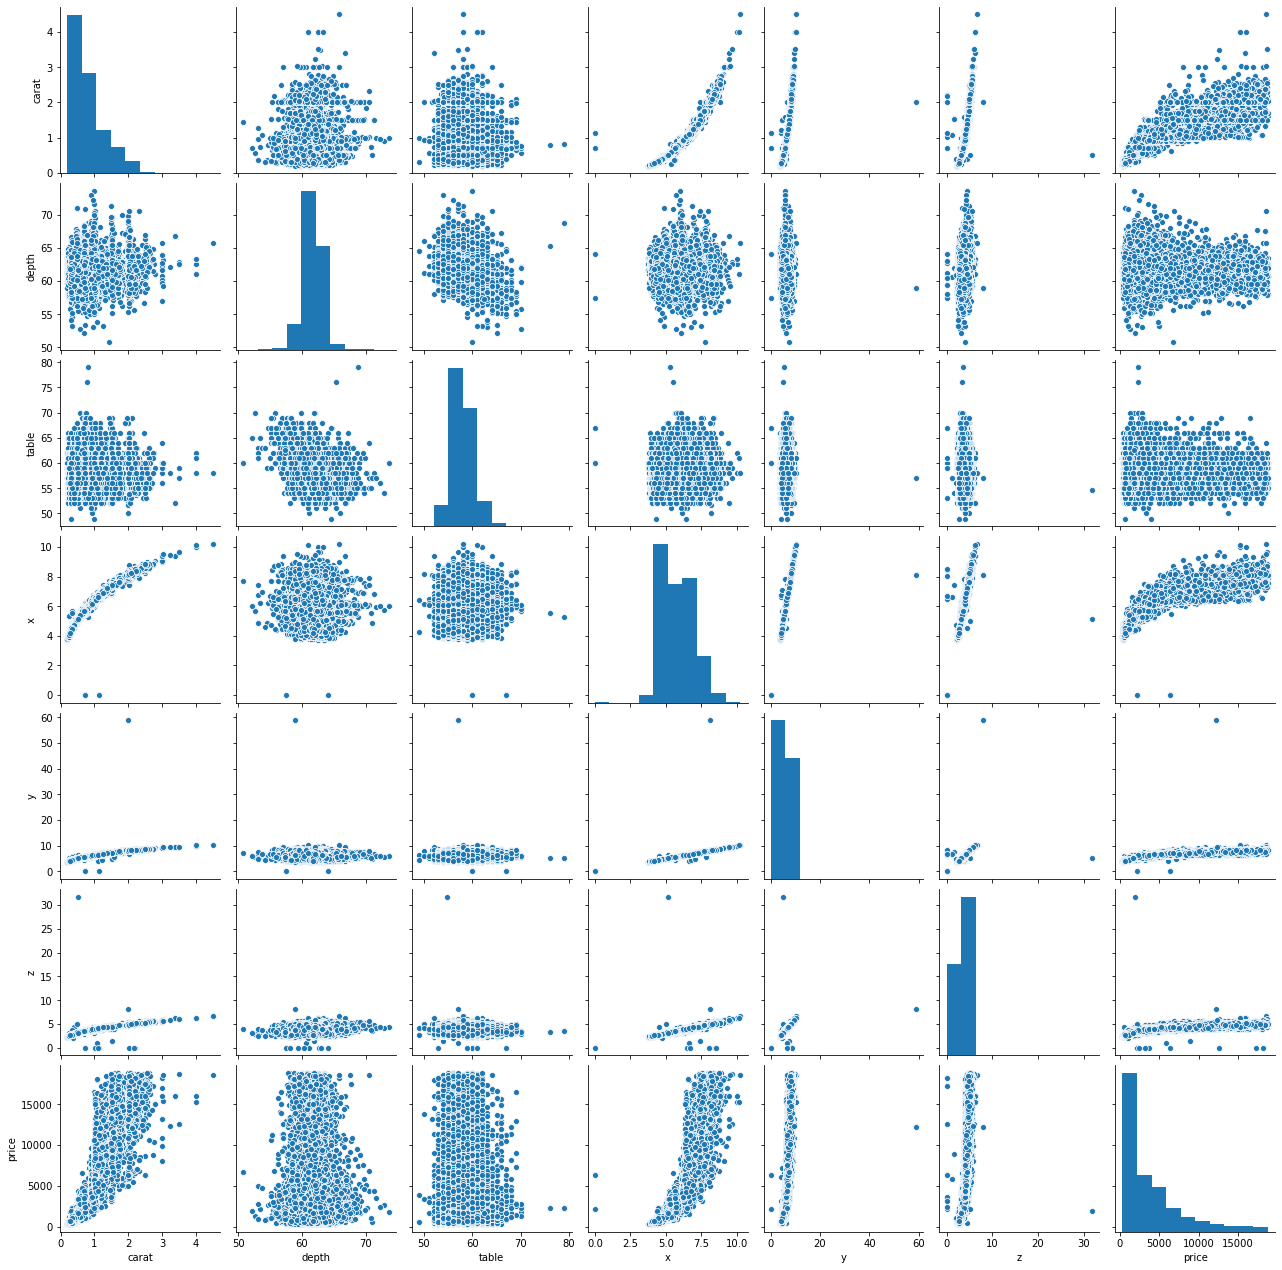

In [15]:
sns.pairplot(data=df)

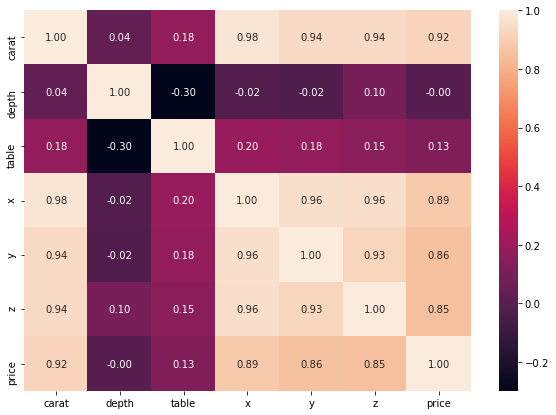

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [17]:
correlations = df.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.922409
x        0.886554
y        0.856441
z        0.850682
table    0.126844
depth   -0.002895
Name: price, dtype: float64

From the correlation plot, we can see that various attributes of the datset are highly correlated to each other except 'depth','table'.

Correlation  values  near  to  1  or -1  are  highly  positively correlated and  highly  negatively correlated respectively.

Correlation values near to 0 are not correlated to each other.


### EDA for Categorical variables

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

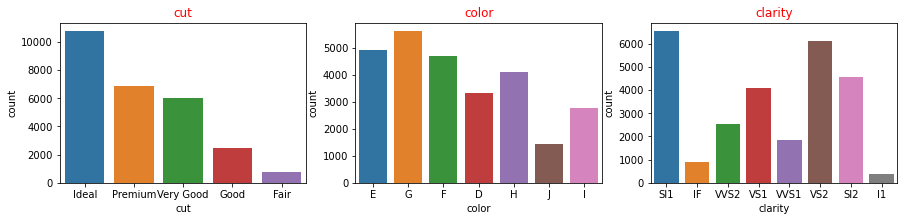

In [18]:
data_plot=df[['cut','color','clarity']]

fig=plt.figure(figsize=(15,10))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot((data_plot[data_plot.columns[i]]))
    ax.set_title(data_plot.columns[i],color='Red')
    

plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

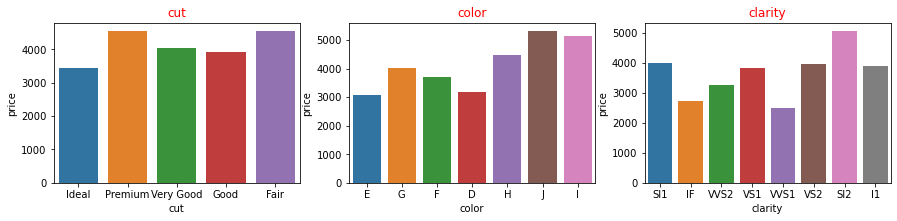

In [19]:
data_plot=df[['cut','color','clarity']]

fig=plt.figure(figsize=(15,10))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    #sns.countplot((data_plot[data_plot.columns[i]]))
    sns.barplot(data=df,x=data_plot[data_plot.columns[i]],y=df['price'],ci=None)
    ax.set_title(data_plot.columns[i],color='Red')
    

plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

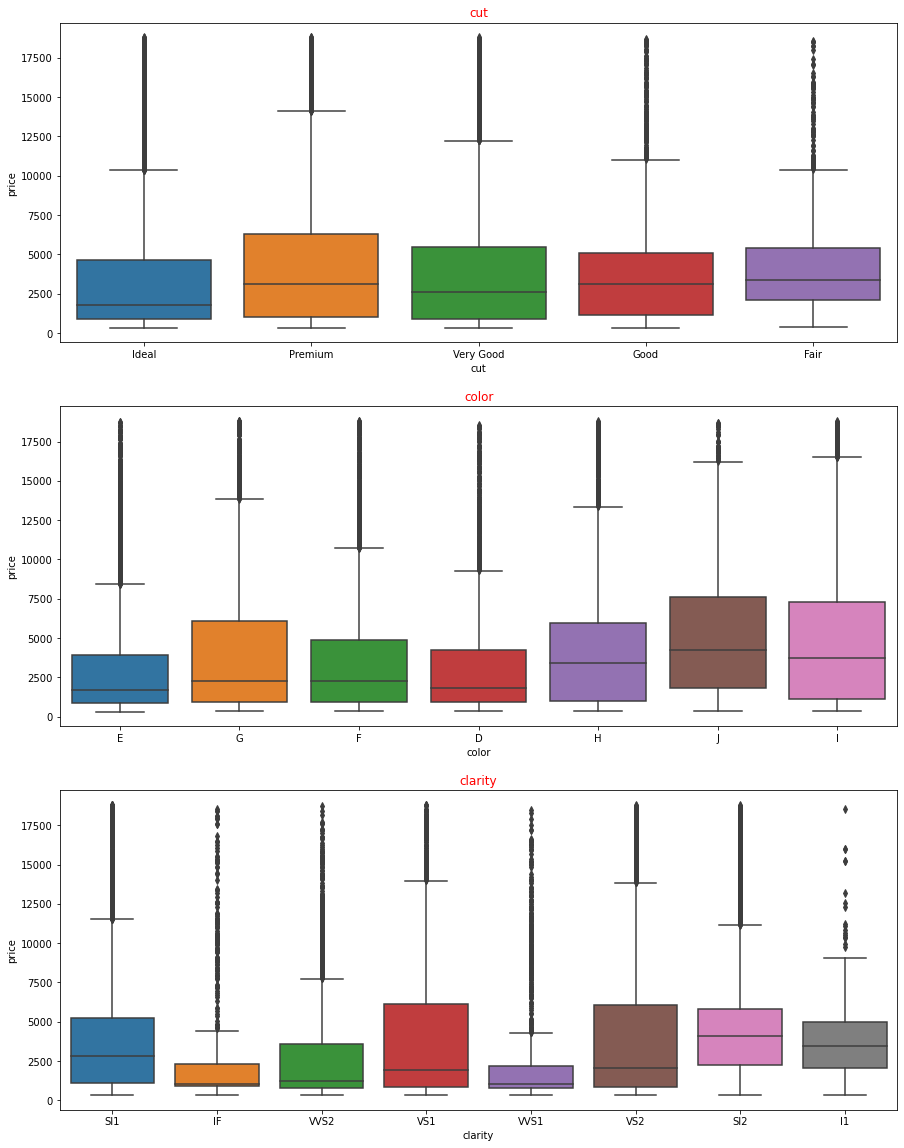

In [20]:
data_plot=df[['cut','color','clarity']]

fig=plt.figure(figsize=(15,20))

for i in range(0,len(data_plot.columns)):
    #sns.countplot((data_plot[data_plot.columns[i]]))
    ax=fig.add_subplot(3,1,i+1)
    sns.boxplot(data=df,x=data_plot[data_plot.columns[i]],y=df['price'])
    ax.set_title(data_plot.columns[i],color='Red')
    

plt.tight_layout

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]

for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

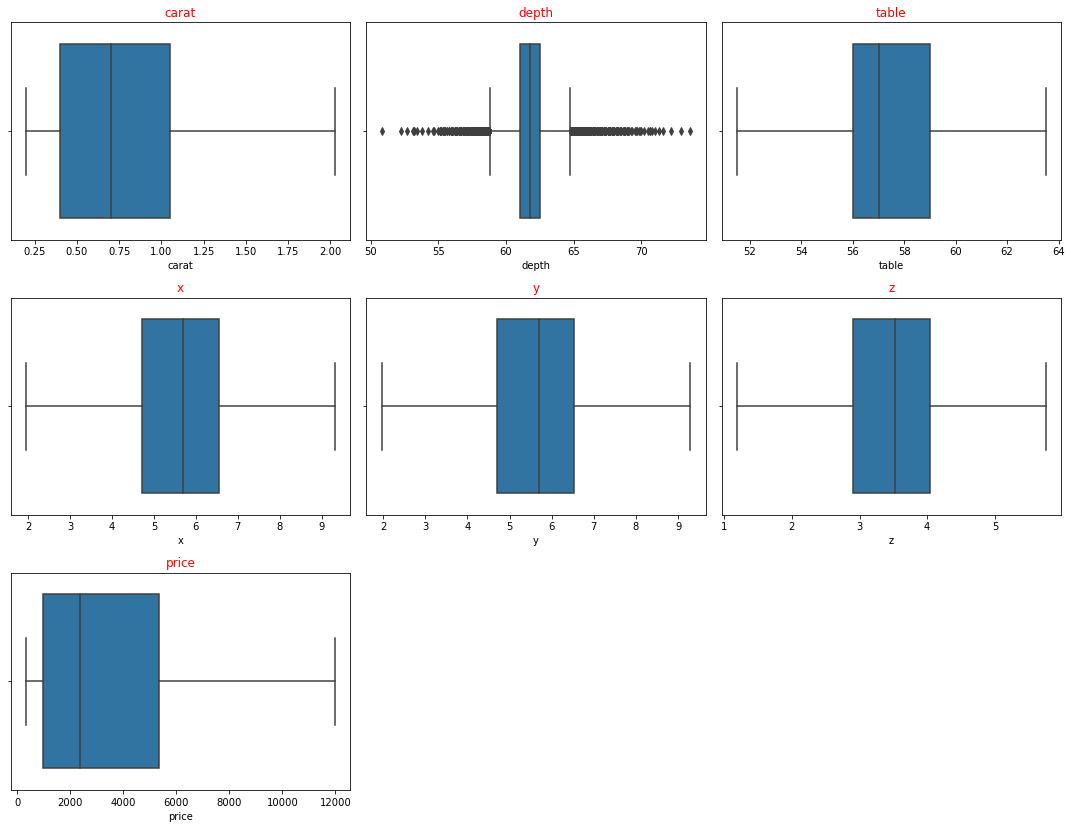

In [23]:
data_plot=df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

fig=plt.figure(figsize=(15,15))

for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')

plt.tight_layout()

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [24]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [25]:
# Column 'Depth' have null values, we will replace them with median value as outliers are present for given data column.

In [26]:
df['depth'].median()

61.8

In [27]:
df['depth'] = df['depth'].fillna(df['depth'].median())

In [28]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#######################################################################################

In [29]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,61.746701,57.435544,5.729323,5.731255,3.536928,3735.832213
std,0.462127,1.393875,2.157119,1.126175,1.118155,0.696753,3468.207359
min,0.200000,50.800000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,73.600000,63.500000,9.310000,9.285000,5.750000,11972.500000


In [30]:
# from descriptive statistics we can say that column x,y,z have min value as Zero.
# observations where length, width,height of the column equal to zero, doesnot make any sense so we will drop those.

In [31]:
df[df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [32]:
df = df.drop(df[df['x'] == 0].index)

In [33]:
df = df.drop(df[df['y'] == 0].index)

In [34]:
df = df.drop(df[df['z'] == 0].index)

In [35]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,61.746701,57.435544,5.729323,5.731255,3.536928,3735.832213
std,0.462127,1.393875,2.157119,1.126175,1.118155,0.696753,3468.207359
min,0.200000,50.800000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,73.600000,63.500000,9.310000,9.285000,5.750000,11972.500000


In [36]:
df.shape

(26933, 10)

In [37]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 6
(26933, 10)


########################################################################################################

No, it is not necessary, we'll get an equivalent solution whether we apply some kind of linear scaling or not. 

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [38]:
for column in df[['cut','color','clarity']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [39]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [40]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779.0


In [41]:
df.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [42]:
#### Train Test Split

In [43]:
x = df.drop('price',axis=1)

In [44]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65


In [45]:
x.shape

(26933, 9)

In [46]:
y = df['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [48]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [49]:
linear_model.coef_

array([ 9239.60917425,    49.38643584,  -233.11123964,   253.23114414,
         -95.47374742,   -74.38508401, -2061.51266812,  1451.07224411,
        -120.86503096])

In [50]:
linear_model.intercept_

10009.642089413883

In [51]:
###### R Squared

R-square is the percentage of the response variable variation that is explained by a linear model. Or:

R-square = Explained variation / Total variation

R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean. In this regression model we can see the R-square value on Training and Test data respectively ---

In [52]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779.0


In [53]:
linear_model.score(X_train, y_train)

0.9088411186720851

In [54]:
linear_model.score(X_test, y_test)

0.91195464395757

In [55]:
###### RMSE

In [56]:
print("The Root Mean Square Error (RMSE) of the model is for Train set is",np.sqrt(mean_squared_error(y_train,linear_model.predict(X_train))))

The Root Mean Square Error (RMSE) of the model is for Train set is 1046.3627034315593


In [57]:
print("The Root Mean Square Error (RMSE) of the model is for Test set is",np.sqrt(mean_squared_error(y_test,linear_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for Test set is 1030.8171197572353


In [58]:
# Method 2

In [59]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,4,4,5,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,2,1,5,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,2,3,2,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,1,3,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,2,3,61.1,62.0,6.54,6.49,3.98,4057.0


In [60]:
import statsmodels.formula.api as smf

In [61]:
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    10009.642089
carat         9239.609174
cut             49.386436
color         -233.111240
clarity        253.231144
depth          -95.473747
table          -74.385084
x            -2061.512668
y             1451.072244
z             -120.865031
dtype: float64

In [62]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:40:51   Log-Likelihood:            -1.5784e+05
No. Observations:               18853   AIC:                         3.157e+05
Df Residuals:                   18843   BIC:                         3.158e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.001e+04    689.401     14.519      0.000    8658.354    1.14e+04
carat       9239.6092     93.652     98.659      0.000    9056.043    9423.175
cut           49.3864      7.707      6.408      0.000      34.280      64.492
color       -233.1112      4.693    -49.673      0.000    -242.310    -223.913
clarity      253.2311      4.565     55.475      0.000     244.284     262.179
depth        -95.4737      9.241    -10.332      0.000    -113.587     -77.361
table        -74.3851      3.853    -19.305      0.000     -81.938     -66.833
x          -2061.5127    137.351    -15.009      0.000   -2330.733   -1792.292
y           1451.0722    137.294     10.569      0.000    1181.964    1720.181
z           -120.8650    115.579     -1.046      0.296    -347.411     105.681
==============================================================================
Omnibus:                     5154.247   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25515.289
Skew:                           1.239   Prob(JB):                         0.00
Kurtosis:                       8.133   Cond. No.                     7.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(10009.64) * Intercept + (9239.61) * carat + (49.39) * cut + (-233.11) * color + (253.23) * clarity + (-95.47) * depth + (-74.39) * table + (-2061.51) * x + (1451.07) * y + (-120.87) * z + 

### Linear regression Performance Metrics:

intercept for the model: 17392.107135

R square on training data: 0.8864322735564664

R square on testing data: 0.8904197512440206

RMSE on Training data: 1350.710593467683

RMSE on Testing data: 1340.8868319807666

As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

The Gem Stones company should consider the features 'Carat', 'color','clarity',length i.e 'x' and ‘width’ i.e. ‘y’ as most important for predicting the price, in order to distinguish between higher profitable stones and lower profitable stones so as to have better profit share.
The ‘Ideal Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.

Color G are most preferred diamonds with average price.
& Color J is least preferred and manufactured as its most expensive among other diamonds.
The Diamonds clarity with SI2 are the most Expensive. So these two category also consider in higher profitable stones.
As we see for 'X' i.e., Length of the stone, higher the length of the stone is lower the price.
So higher the Length('x') of the stone is lower is the profitability. 
Also, higher the 'z' i.e Height of the stone is, lower the price. This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance.
